<a href="https://colab.research.google.com/github/kapil0808/Google-stock-price-pediction-using-LSTM/blob/master/Google_stock_price_pediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/GOOG.csv',date_parser=True)
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800


In [ ]:
data_training=dataset[dataset['Date']<'2019-01-01'].copy()
data_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800
3616,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [ ]:
data_test=dataset[dataset['Date']>='2019-01-01'].copy()
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4019,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,1500.099976,1995400
4020,2020-08-07,1500.000000,1516.844971,1481.640015,1494.489990,1494.489990,1576600
4021,2020-08-10,1487.180054,1504.074951,1473.079956,1496.099976,1496.099976,1289300
4022,2020-08-11,1492.439941,1510.000000,1478.000000,1480.319946,1480.319946,1454400
4023,2020-08-12,1485.579956,1512.385986,1485.250000,1506.619995,1506.619995,1437000


In [ ]:
data_training=data_training.drop(['Date','Adj Close'],axis=1)
data_training.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
data_training=scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [ ]:
data_training.shape[0]

3617

In [ ]:
x_train=[]
y_train=[]
for i in range(60,data_training.shape[0]):
  x_train.append(data_training[i-60:i])
  y_train.append(data_training[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(3557, 60, 5)

In [ ]:
y_train.shape

(3557,)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
regressior=Sequential()
regressior.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
regressior.add(Dropout(0.2))

In [ ]:
regressior.add(LSTM(units=60,activation='relu',return_sequences=True))
regressior.add(Dropout(0.3))

In [ ]:
regressior.add(LSTM(units=80,activation='relu',return_sequences=True))
regressior.add(Dropout(0.4))

In [ ]:
regressior.add(LSTM(units=120,activation='relu'))
regressior.add(Dropout(0.5))

In [ ]:
regressior.add(Dense(units=1))

In [ ]:
regressior.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 120)              

In [ ]:
regressior.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
regressior.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
112/112 [==============================] - 16s 145ms/step - loss: 0.0126
Epoch 2/10
112/112 [==============================] - 17s 151ms/step - loss: 0.0047
Epoch 3/10
112/112 [==============================] - 17s 148ms/step - loss: 0.0041
Epoch 4/10
112/112 [==============================] - 17s 148ms/step - loss: 0.0044
Epoch 5/10
112/112 [==============================] - 17s 150ms/step - loss: 0.0031
Epoch 6/10
112/112 [==============================] - 17s 150ms/step - loss: 0.0030
Epoch 7/10
112/112 [==============================] - 17s 150ms/step - loss: 0.0027
Epoch 8/10
112/112 [==============================] - 17s 150ms/step - loss: 0.0027
Epoch 9/10
112/112 [==============================] - 17s 149ms/step - loss: 0.0024
Epoch 10/10
112/112 [==============================] - 17s 148ms/step - loss: 0.0025


In [ ]:
df=dataset[len(dataset)-len(data_test)-60:]
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
3557,1195.329956,1197.510010,1155.576050,1168.189941,2209500
3558,1167.500000,1173.500000,1145.119995,1157.349976,1184300
3559,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3560,1146.150024,1154.349976,1137.572021,1138.819946,1308700
3561,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [ ]:
inputs=scaler.fit_transform(df)
inputs

array([[0.36117037, 0.33245356, 0.31748644, 0.32412576, 0.31777455],
       [0.31577743, 0.29130177, 0.29958744, 0.30582336, 0.14281082],
       [0.28741289, 0.28187509, 0.26919222, 0.2916744 , 0.27048383],
       ...,
       [0.83720181, 0.85788836, 0.86099925, 0.87777532, 0.16073044],
       [0.84578112, 0.86804355, 0.86942153, 0.85113202, 0.1889069 ],
       [0.83459192, 0.872133  , 0.8818323 , 0.89553752, 0.18593737]])

In [ ]:
x_test=[]
y_test=[]
for i in range(60,inputs.shape[0]):
  x_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

In [ ]:
x_test.shape,y_test.shape

((407, 60, 5), (407,))

In [ ]:
y_pred=regressior.predict(x_test)

In [ ]:
scaler.scale_


array([1.63108199e-03, 1.71394289e-03, 1.71183033e-03, 1.68841908e-03,
       1.70663026e-07])

In [ ]:
scale=1/1.63108199e-03
scale

613.0899649011512

In [ ]:
y_pred=y_pred*scale
y_test=y_test*scale

In [ ]:
y_pred

array([[ 79.74197 ],
       [ 78.66398 ],
       [ 77.63683 ],
       [ 76.708015],
       [ 75.935356],
       [ 75.36722 ],
       [ 75.04635 ],
       [ 74.977356],
       [ 75.12981 ],
       [ 75.45614 ],
       [ 75.9089  ],
       [ 76.48918 ],
       [ 77.19831 ],
       [ 78.04537 ],
       [ 79.010574],
       [ 80.04266 ],
       [ 81.110855],
       [ 82.18682 ],
       [ 83.253136],
       [ 84.28345 ],
       [ 85.28123 ],
       [ 86.249695],
       [ 87.179565],
       [ 88.105095],
       [ 89.026245],
       [ 89.94503 ],
       [ 90.81831 ],
       [ 91.649345],
       [ 92.51454 ],
       [ 93.46482 ],
       [ 94.58254 ],
       [ 95.92114 ],
       [ 97.4275  ],
       [ 99.09637 ],
       [100.923836],
       [102.88529 ],
       [104.90595 ],
       [106.93823 ],
       [108.88514 ],
       [110.69491 ],
       [112.34891 ],
       [113.904526],
       [115.43318 ],
       [117.05557 ],
       [118.84355 ],
       [120.78854 ],
       [122.839195],
       [124.9

In [ ]:
y_test

array([ 42.66998292,  67.09997588,  58.68994189,  97.59997583,
       102.20996082, 107.74999981,  93.76000983,  89.28002984,
        73.02001987,  76.27001986, 106.09997581, 105.56994681,
       126.09997577, 114.0999758 , 103.44995181, 102.57995582,
       111.0999758 , 106.20996081,  98.78002982,  94.53002983,
       129.09997577, 138.49999975, 138.76000975, 150.93994173,
       165.6699217 , 130.26000977, 113.0999758 , 123.04992678,
       132.90002476, 151.08996573, 144.15002474, 156.17993172,
       136.09997576, 146.08996574, 136.93994175, 126.99999977,
       142.09997575, 131.84997576, 133.04992676, 137.40002475,
       150.99999973, 173.08996569, 176.16003468, 188.58996566,
       181.81994667, 152.82995573, 170.54992669, 204.35998563,
       226.74499559, 220.6099856 , 219.47998061, 209.40002462,
       214.91003461, 223.4499516 , 242.09997557, 252.41992155,
       223.0300296 , 224.6300046 , 211.59997562, 197.64001465,
       200.99999964, 210.19995162, 221.4199216 , 233.57

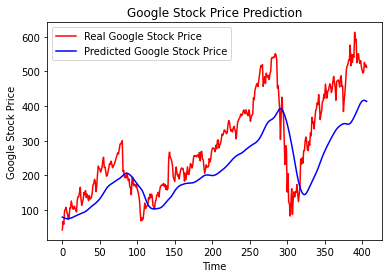

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()